In [1]:
from caricatore_immagini import ImageLoader

In [2]:
train_dir = "images/FER2013Train"
val_dir = "images/FER2013Valid"
test_dir = "images/FER2013Test"

train_csv = "data/FER2013Train/label_train.csv"
val_csv = "data/FER2013Valid/label_valid.csv"
test_csv = "data/FER2013Test/label_test.csv"

In [6]:

train_set = ImageLoader(train_dir, train_csv)
X_train , y_train = train_set.load_data()

In [7]:
test_set = ImageLoader(test_dir , test_csv)
X_test , y_test = test_set.load_data()

In [8]:

val_set = ImageLoader(val_dir , val_csv)
X_val , y_val = val_set.load_data()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Rescaling, BatchNormalization, GlobalAveragePooling2D

In [64]:

model = Sequential()

model.add(Rescaling(1./255, input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(48, 48, 1),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D((2, 2)))  

model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2)))  
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.2))

model.add(Flatten())  # Flatten 3D output to 1D
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

#compilazione
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

#summary modello
model.summary()

c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,537 (1.66 MB)

 Trainable params: 434,473 (1.66 MB)

 Non-trainable params: 64 (256.00 B)

In [8]:
history = model.fit(X_train, y_train,                  
                    epochs=10,
                    batch_size = 32,
                    validation_data=(X_val , y_val)) 

Epoch 1/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 130s 143ms/step - accuracy: 0.4112 - loss: 1.7833 - val_accuracy: 0.6129 - val_loss: 1.3893
Epoch 2/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 138s 155ms/step - accuracy: 0.6175 - loss: 1.4354 - val_accuracy: 0.6821 - val_loss: 1.2741
Epoch 3/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 150s 169ms/step - accuracy: 0.6578 - loss: 1.3352 - val_accuracy: 0.6958 - val_loss: 1.2400
Epoch 4/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 136s 152ms/step - accuracy: 0.6732 - loss: 1.2927 - val_accuracy: 0.7115 - val_loss: 1.1976
Epoch 5/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 132s 148ms/step - accuracy: 0.6914 - loss: 1.2540 - val_accuracy: 0.7146 - val_loss: 1.1591
Epoch 6/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 124s 140ms/step - accuracy: 0.6990 - loss: 1.2312 - val_accuracy: 0.7255 - val_loss: 1.1462
Epoch 7/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 122s 137ms/step - accuracy: 0.7080 - loss: 1.2180 - val_accuracy: 0.7364 - val_loss: 1.1301
Epoch 8/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 126s 142ms/step - accuracy: 0.7175 -

In [13]:
import numpy as np
import pandas as pd

In [14]:
import os
print(os.getcwd())  # Stampa la directory corrente

c:\Users\Alessio\Desktop\Project_work - CRIF


In [44]:
df = pd.read_csv(r'C:\Users\Alessio\Desktop\Project_work - CRIF\data\FER2013Train\label_train.csv')
df.head()

,Image name,dim,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,fer0000000.png,"(0, 0, 48, 48)",4,0,0,1,3,2,0,0,0,0
1,fer0000001.png,"(0, 0, 48, 48)",6,0,1,1,0,0,0,0,2,0
2,fer0000002.png,"(0, 0, 48, 48)",5,0,0,3,1,0,0,0,1,0
3,fer0000003.png,"(0, 0, 48, 48)",4,0,0,4,1,0,0,0,1,0
4,fer0000004.png,"(0, 0, 48, 48)",9,0,0,1,0,0,0,0,0,0


In [45]:

# Elimina l'ultima colonna e sovrascrive i file csv

files = ['C:/Users/Alessio/Desktop/Project_work - CRIF/data/FER2013Train/label_train.csv',
         'C:/Users/Alessio/Desktop/Project_work - CRIF/data/FER2013Test/label_test.csv',
         'C:/Users/Alessio/Desktop/Project_work - CRIF/data/FER2013Valid/label_valid.csv']

for file in files:

    df = pd.read_csv(file)

    df = df.iloc[:, :-1] 

    df.to_csv(file, index=False)
   


In [46]:
df = pd.read_csv('data/FER2013Train/label_train.csv')
print("Colonne del DataFrame:", df.columns)

Colonne del DataFrame: Index(['Image name', 'dim', 'neutral', 'happiness', 'surprise', 'sadness',
       'anger', 'disgust', 'fear', 'contempt', 'unknown'],
      dtype='object')


In [52]:
print("Shape di X_train:", X_train.shape) 
print("Shape di y_train:", y_train.shape)

Shape di X_train: (28447, 48, 48, 1)
Shape di y_train: (28447, 9)


In [51]:
df.iloc[:, 2:].sum()

neutral      85049
happiness    73294
surprise     32956
sadness      38359
anger        22504
disgust       4238
fear          9626
contempt      4838
unknown      13605
dtype: int64

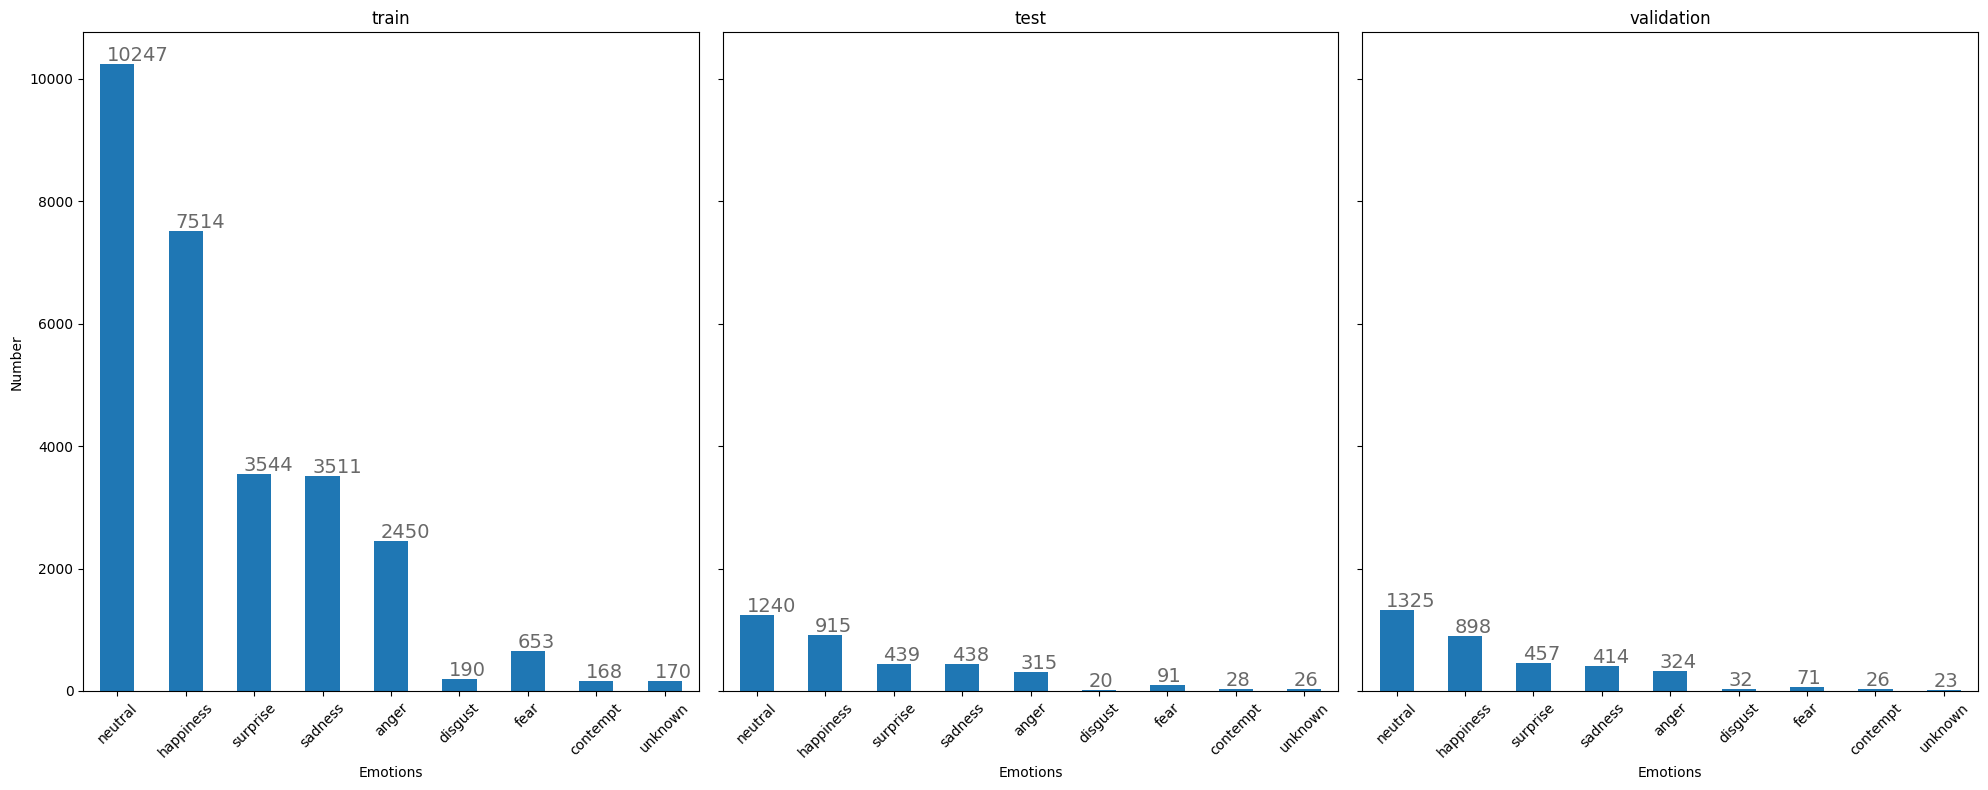

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

emotion_labels = ['neutral','happiness','surprise','sadness','anger','disgust','fear','contempt','unknown']

def setup_axe(axe, y_data, title):
    # Passo 1: Se y_data è one-hot encoded, converti in etichette intere
    if len(y_data.shape) > 1 and y_data.shape[1] > 1:  # Se è one-hot encoded
        y_data = np.argmax(y_data, axis=1)  # Converte in etichette di classe
    
    # Crea una Serie pandas dalle etichette delle emozioni
    y_series = pd.Series(y_data)
    
    # Conta le occorrenze di ciascuna emozione
    y_counts = y_series.value_counts(sort=False).sort_index()  # sort_index() per allineare con l'ordine delle emotion_labels
    
    # Plot dell'istogramma
    y_counts.plot(ax=axe, kind='bar', rot=0)
    
    # Imposta le etichette per l'asse X e le posizioni corrispondenti
    axe.set_xticks(range(len(emotion_labels)))  # Imposta i tick basati sul numero di etichette
    axe.set_xticklabels(emotion_labels, rotation=45)  # Assegna le etichette
    
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
    
    # Etichette per le barre
    for i in axe.patches:
        axe.text(i.get_x() + i.get_width()/2 - 0.15, i.get_height() + 50,
                 str(int(i.get_height())), fontsize=14, color='dimgrey')

# Crea i sottoplot per train, test, e validation set
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

# Chiama la funzione setup_axe per ciascun set di dati
setup_axe(axes[0], y_train, 'train')
setup_axe(axes[1], y_test, 'test')
setup_axe(axes[2], y_val, 'validation')

# Mostra l'istogramma
plt.tight_layout()
plt.show()


In [69]:
# Pesi e data augmentation

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(np.argmax(y_train, axis=1)), # indica quali classi sono presenti nel set, e converte le etichette in numeri (indici)
                                                 y=np.argmax(y_train, axis=1))

# Trasforma in dizionario per passarlo a `model.fit`
class_weights_dict = dict(enumerate(class_weights))  # chiavi: indici, valore : peso

print(f"Pesi delle classi:, {class_weights_dict}")


Pesi delle classi:, {0: 0.3084588443229997, 1: 0.42065182030579956, 2: 0.8918673187860546, 3: 0.9002500079116428, 4: 1.2901133786848074, 5: 16.635672514619884, 6: 4.8403947592309, 7: 18.81415343915344, 8: 18.59281045751634}


In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation (diverse prove)
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotazione casuale fino a 20 gradi
    width_shift_range=0.2,  # Traslazione casuale orizzontale
    height_shift_range=0.2, # Traslazione casuale verticale
    zoom_range=0.2,         # Zoom casuale
    horizontal_flip=True,   # Flip orizzontale
    fill_mode='nearest')    # Riempie i pixel mancanti

datagen.fit(X_train)


In [67]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [ ]:
# Addestramento del modello con data augmentation e pesi di classe
history = model.fit(datagen.flow(X_train, y_train),
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_val, y_val), 
                    class_weight=class_weights_dict)  


In [73]:
# Modello funzionale

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(48, 48, 1))  # Input layer

# Layer convoluzionali
x = Rescaling(1./255)(inputs)  # Normalizzazione
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

# Flatten e aggiungi strati densi
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.7)(x)
outputs = Dense(9, activation='softmax')(x)  # 9 classi

# Creare il modello
model = Model(inputs=inputs, outputs=outputs)

# Passo 2: Compilare il Modello
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Passo 3: Visualizzare il riassunto del modello
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,537 (1.66 MB)

 Trainable params: 434,473 (1.66 MB)

 Non-trainable params: 64 (256.00 B)

In [74]:
history = model.fit(X_train, y_train,                  
                    epochs=10,
                    batch_size = 32,
                    validation_data=(X_val , y_val)) 

Epoch 1/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 120s 131ms/step - accuracy: 0.3543 - loss: 1.8759 - val_accuracy: 0.5961 - val_loss: 1.4829
Epoch 2/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 113s 127ms/step - accuracy: 0.5718 - loss: 1.5344 - val_accuracy: 0.6658 - val_loss: 1.3027
Epoch 3/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 115s 130ms/step - accuracy: 0.6278 - loss: 1.4165 - val_accuracy: 0.6857 - val_loss: 1.2797
Epoch 4/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 113s 128ms/step - accuracy: 0.6495 - loss: 1.3618 - val_accuracy: 0.6927 - val_loss: 1.2204
Epoch 5/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 118s 133ms/step - accuracy: 0.6618 - loss: 1.3300 - val_accuracy: 0.7011 - val_loss: 1.1974
Epoch 6/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 115s 129ms/step - accuracy: 0.6686 - loss: 1.3068 - val_accuracy: 0.7070 - val_loss: 1.2038
Epoch 7/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 115s 129ms/step - accuracy: 0.6784 - loss: 1.2937 - val_accuracy: 0.7207 - val_loss: 1.1825
Epoch 8/10
889/889 ━━━━━━━━━━━━━━━━━━━━ 116s 130ms/step - accuracy: 0.6828 -

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=emotion_labels))

110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step
              precision    recall  f1-score   support

     neutral       0.63      0.94      0.75      1240
   happiness       0.83      0.83      0.83       915
    surprise       0.70      0.75      0.73       439
     sadness       0.57      0.17      0.27       438
       anger       0.74      0.35      0.47       315
     disgust       0.00      0.00      0.00        20
        fear       0.00      0.00      0.00        91
    contempt       0.00      0.00      0.00        28
     unknown       0.00      0.00      0.00        26

    accuracy                           0.69      3512
   macro avg       0.38      0.34      0.34      3512
weighted avg       0.66      0.69      0.65      3512



c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

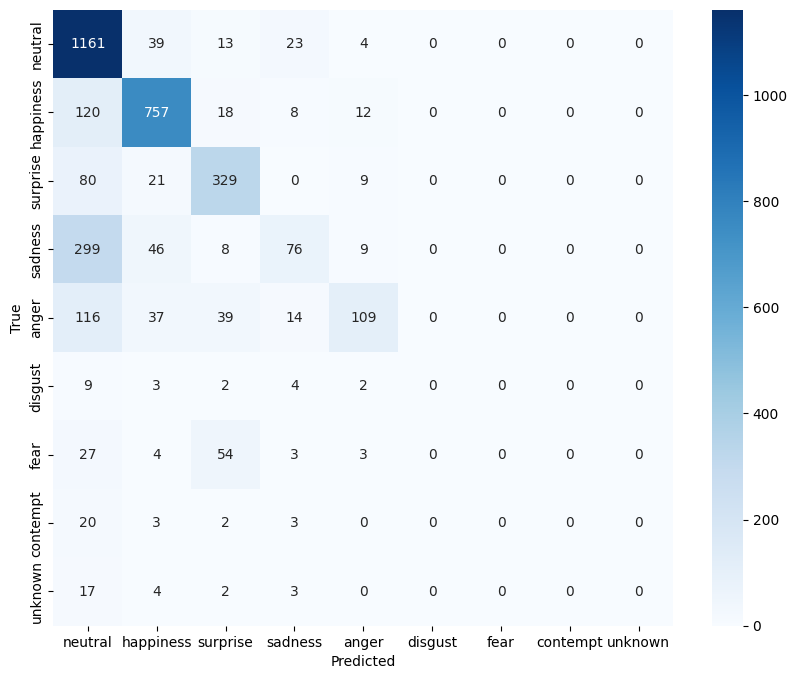

In [76]:
# Matrice di confusione

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

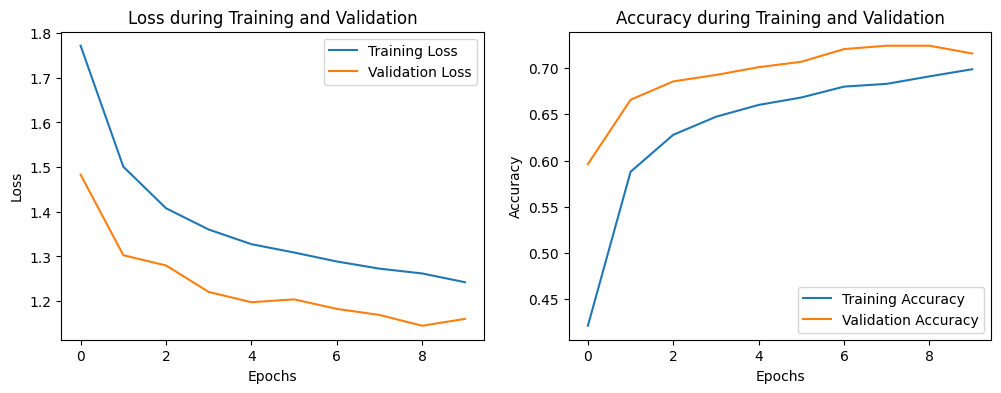

In [77]:
# Grafico della loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Grafico dell'accuratezza

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam
from keras_tuner import Hyperband

In [81]:
# Sottoinsieme casuale del dataset per l'ottimizzazione degli hp (20% del totale)
num_samples = int(0.20 * len(X_train))

# Seleziona casualmente indici dal dataset
random_indices = np.random.choice(len(X_train), num_samples, replace=False)

# Crea il sottoinsieme
X_train_subset = X_train[random_indices]
y_train_subset = y_train[random_indices]

In [82]:
# Funzione di costruzione del modello per Keras Tuner
def build_model(hp):
    inputs = Input(shape=(48, 48, 1))  # Input layer, definisce la forma delle immagini
    
    # Normalizza i valori dei pixel delle immagini, portandoli nell'intervallo [0, 1]
    x = Rescaling(1./255)(inputs)

    # Layer convoluzionali con scelta dinamica degli iperparametri
    for i in range(hp.Int('conv_blocks', 2, 3, default=3)):  # Numero di blocchi convoluzionali variabile
        filters = hp.Choice(f'filters_{i}', values=[32, 64, 128], default=64) # Numero di filtri in ciascun blocco
        x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x) # filtro matrice 3x3 e selezione del numero di caratteristiche da rilevare
        x = BatchNormalization()(x) # normalizzazione dell'output di un layer riducendone la varianza
        x = Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2))(x) # riduce la dimensione spaziale dell'output e salva le info più significative
        if i > 1:
            x = Dropout(0.2)(x) # il 20% dei neuroni del layer sarà temporaneamente disattivato casualmente durante l'addestramento in ogni ciclo (epoca). In fase di test, invece, tutti i neuroni sono attivi.
    
    # Flatten e aggiungi strati densi
    x = Flatten()(x) # converte l'output in un vettore 1D
    x = Dense(hp.Choice('dense_units', values=[32, 64, 128], default=64), activation='relu')(x) # layer completamente connesso in cui ogni neurone è collegato a tutti i neuroni del layer precedente. (64 = numeri di neuroni, "unità di calcolo" per apprendere le combinazioni di caratteristiche)
    x = Dropout(hp.Float('dropout_rate', 0.4, 0.6, step=0.2, default=0.4))(x)
    
    # Output
    outputs = Dense(9, activation='softmax')(x) # stabilisce la probabilità che quella immagine appartenga a quella classe

    # Creaione del modello
    model = Model(inputs=inputs, outputs=outputs)
    
    # compilazione il modello
    model.compile(optimizer=Adam(learning_rate = hp.Choice('learning_rate', values=[1e-4, 3e-4, 1e-3, 3e-3, 1e-2], default=1e-3)),
                  loss='categorical_crossentropy',  # Per etichette one-hot
                  metrics=['accuracy'])
    
    return model

# Configurazione Hyperband
tuner = Hyperband(
    build_model,
    objective='val_accuracy',  # Ottimizza per la validazione
    max_epochs=20, # il numero massimo di epoche per cui Hyperband addestrerà ciascuna configurazione di iperparametri
    factor=3,  # Fattore di riduzione di Hyperband :dopo che tutte le configurazioni hanno completato alcune epoche, solo 1/3 delle migliori continuerà a essere addestrato per più epoche
    directory='hyperband_dir',  # Cartella per salvare i risultati
    project_name='emotion_classification')  # Nome del progetto

# ricerca degli iperparametri
tuner.search(X_train_subset, y_train_subset,  # Il modello viene addestrato su un sottoinsieme del dataset di addestramento
             validation_data=(X_val, y_val),  # dati di validazione forniti come input per valutare le prestazioni del modello durante il processo di ottimizzazione. 
             epochs=20,  # Numero massimo di epoche,non tutte usate
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# visualizzazione migliori iperparametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Migliori iperparametri: {best_hps.values}")

# costruzione miglior modello
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

Trial 30 Complete [00h 18m 26s]
val_accuracy: 0.6268907785415649

Best val_accuracy So Far: 0.6703081130981445
Total elapsed time: 03h 42m 35s
Migliori iperparametri: {'conv_blocks': 3, 'filters_0': 64, 'filters_1': 128, 'filters_2': 128, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.0003, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0022'}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,146,569 (4.37 MB)

 Trainable params: 1,145,929 (4.37 MB)

 Non-trainable params: 640 (2.50 KB)

In [83]:
best_model.save('best_emotion_model.h5')

In [84]:
# compilazione del modello

best_model.compile(optimizer=Adam(),  # aggiornamento dei pesi durante l'addestramento
              loss='categorical_crossentropy',  # differenza tra etichette reali e predette
              metrics=['accuracy'])

In [85]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',       # Metrica da monitorare
    patience=5,               # Numero di epoche senza miglioramenti
    restore_best_weights=True # Ripristina i pesi migliori alla fine
)

reduce_lr = ReduceLROnPlateau(  # serve a ridurre il LR durante l'addestramneto quando la metrica monitorata smette di migliorare
    monitor='val_loss',    # Metrica da monitorare
    factor=0.1,            # Riduce il learning rate di un fattore 0.1 (10%)
    patience=3,            # Numero di epoche senza miglioramento prima di ridurre il LR
    min_lr=1e-6,           # Limite inferiore del learning rate, non si può andare al di sotto
    cooldown=2,            # Numero di epoche di "raffreddamento" prima di riapplicare la riduzione
    verbose=1              # Stampa un messaggio quando riduce il LR
)

In [86]:

history_bestmodel = best_model.fit(X_train, y_train,                  
                    epochs=50,
                    batch_size = 32,
                    validation_data=(X_val , y_val),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 395s 440ms/step - accuracy: 0.3818 - loss: 1.9272 - val_accuracy: 0.6171 - val_loss: 1.4581 - learning_rate: 0.0010
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 420s 472ms/step - accuracy: 0.5717 - loss: 1.5123 - val_accuracy: 0.6263 - val_loss: 1.3824 - learning_rate: 0.0010
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 433s 487ms/step - accuracy: 0.6342 - loss: 1.3810 - val_accuracy: 0.6647 - val_loss: 1.2799 - learning_rate: 0.0010
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 367s 413ms/step - accuracy: 0.6748 - loss: 1.3073 - val_accuracy: 0.7053 - val_loss: 1.1701 - learning_rate: 0.0010
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 386s 434ms/step - accuracy: 0.7152 - loss: 1.2191 - val_accuracy: 0.6846 - val_loss: 1.2070 - learning_rate: 0.0010
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 403s 453ms/step - accuracy: 0.7444 - loss: 1.1590 - val_accuracy: 0.7560 - val_loss: 1.0804 - learning_rate: 0.0010
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 408s 459ms/step - accura

In [90]:
# Valutazione del modello sul dataset di test
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.7944 - loss: 1.0347
Test Accuracy: 0.7989749312400818
Test Loss: 1.0408458709716797


110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step


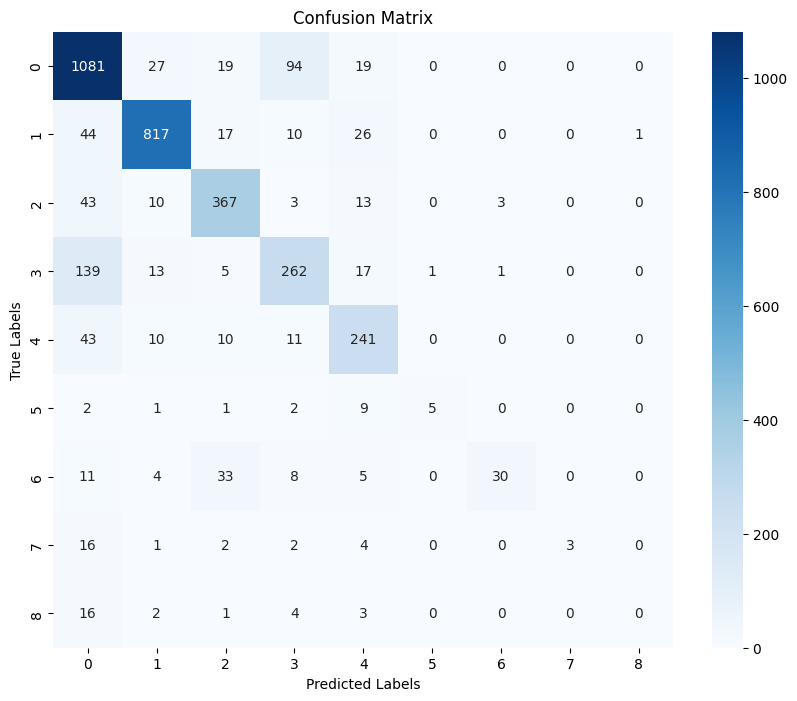

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1240
           1       0.92      0.89      0.91       915
           2       0.81      0.84      0.82       439
           3       0.66      0.60      0.63       438
           4       0.72      0.77      0.74       315
           5       0.83      0.25      0.38        20
           6       0.88      0.33      0.48        91
           7       1.00      0.11      0.19        28
           8       0.00      0.00      0.00        26

    accuracy                           0.80      3512
   macro avg       0.73      0.52      0.55      3512
weighted avg       0.80      0.80      0.79      3512



In [91]:

# Ottieni le predizioni del modello
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converte le predizioni one-hot in classi
y_true = np.argmax(y_test, axis=1)  # Stessa cosa per le etichette vere

# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizza la matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Stampa il rapporto di classificazione
print(classification_report(y_true, y_pred_classes))


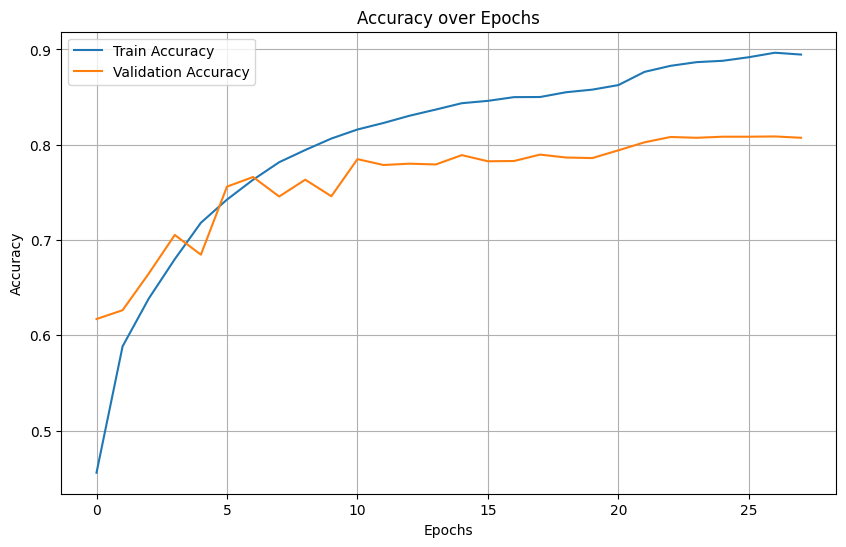

In [92]:
# Grafico dell'accuratezza
plt.figure(figsize=(10, 6))
plt.plot(history_bestmodel.history['accuracy'], label='Train Accuracy')
plt.plot(history_bestmodel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


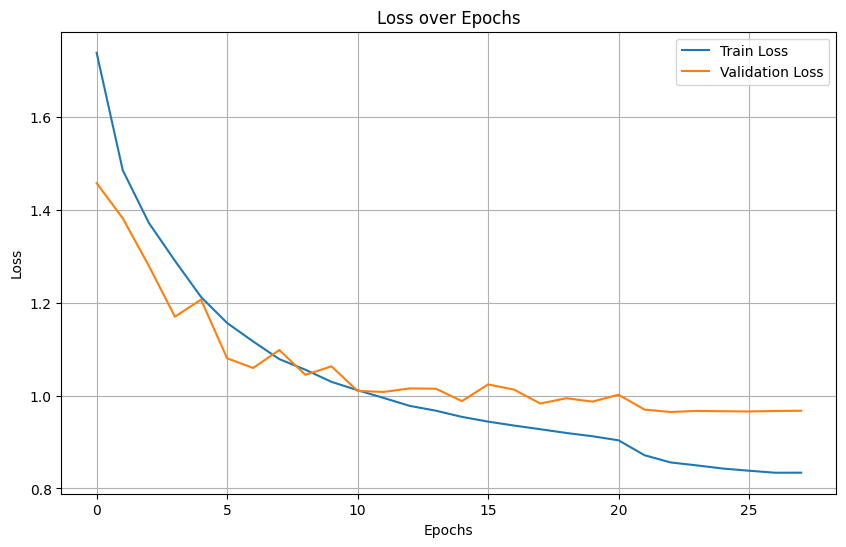

In [93]:
# Grafico della perdita (loss)
plt.figure(figsize=(10, 6))
plt.plot(history_bestmodel.history['loss'], label='Train Loss')
plt.plot(history_bestmodel.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
